## Homework 1 - Joao Lazzaro

santo279@umn.edu

## Question 1

Dividing equations 1 - 4 by $z(s^t)^{-\frac{1}{1-\alpha}}$. Note that $\theta(s^t)(1-n(s^t)) = v(s^t)n(s^t)$. we get:

1) $$ 1 = \beta \sum_{s^{t+1}|s^t} \pi(s_{t+1}|s^t)  \frac{\tilde{c}(s^t)}{\tilde{c}(s^{t+1})} e^{-\frac{s_{t+1}}{1-\alpha}}\left[ \alpha  \left(\frac{\tilde{k}(s^{t+1})}{n(s^{t+1})-\theta(s^{t+1})(1-n(s^{t+1}))}\right)^{\alpha-1} +1-\delta \right]   $$

2)$$ (1-\alpha) \left( \frac{\tilde{k}(s^{t+1})}{n(s^{t+1})-\theta(s^{t+1})(1-n(s^{t+1}))} \right)^\alpha = \beta \mu (\theta(s^t)) \sum_{s^{t+1}|s^t} \pi(s_{t+1}|s^t) \frac{\tilde{c}(s^t)}{\tilde{c}(s^{t+1})} \left( (1-\alpha) \left( \frac{\tilde{k}(s^{t+1})}{n(s^{t+1})-\theta(s^{t+1})(1-n(s^{t+1}))} \right)^\alpha \left(1+ \frac{1-x}{\mu(\theta(s^{t+1}))}\right) - \tilde{w}(s^{t+1})\right)$$

3) $$(1-\tau)\tilde{w}(s^{t+1}) = (1-\phi) \gamma \tilde{c}(s^{t+1}) + \phi(1-\tau)(1-\alpha)   \left( \frac{\tilde{k}(s^{t+1})}{n(s^{t+1})-\theta(s^{t+1})(1-n(s^{t+1}))} \right)^\alpha \left(1+\theta(s^{t+1})\right) $$

4) $$ \tilde{k}(s^{t+1}) = e^{ - \frac{{s}_{t+1}}{1-\alpha}} \left( \tilde{k}(s^t)^\alpha \left(n(s^t) - \theta(s^t) (1-n(s^t))\right) ^{1-\alpha} +(1-\delta) \tilde{k} (s^t) - \tilde{c}(s^t) \right)$$

$$ n(s^{t+1}) =(1-x) n(s^t) +f(\theta(s^t))(1-n(s^t)) $$

Eliminate $\tilde{w}(s^{t+1})$ between 2) and 3) above:

5) $$ (1-\alpha)  \left( \frac{\tilde{k}(s^{t+1})}{n(s^{t+1})-\theta(s^{t+1})(1-n(s^{t+1}))} \right)^\alpha = \beta \mu (\theta(s^t)) \sum_{s^{t+1}|s^t} \pi(s_{t+1}|s^t) \frac{\tilde{c}(s^t)}{\tilde{c}(s^{t+1})}\left( - \frac{(1-\phi) \gamma \tilde{c}(s^{t+1}}{1-\tau} + (1-\alpha)   \left( \frac{\tilde{k}(s^{t+1})}{n(s^{t+1})-\theta(s^{t+1})(1-n(s^{t+1}))} \right)^\alpha \left( \frac{1-x}{\mu(\theta(s^{t+1}))} +1-\phi -\phi\theta(s^{t+1})\right)\right) $$

For notational simplicity, denote: $\tilde{c}(k,n,s_t):=C$ and $\tilde{\theta}(k,n,s):=\Theta$. Note, that $s_{t+1}$, $n(s^{t+1})$ and $\tilde{k}(s^{t+1})$ also depend on $(k,n,s_t)$. Substituting 4) into 5) and 1), we get a system with two nonlinear functional equations that define $C$ and $\Theta$. 

## Question 2

Let's first define some parameters:

In [11]:
using ForwardDiff
using NLsolve
using Plots
using LinearAlgebra

#Parameters
β = 0.996              #Discount Rate
sbar = 0.0012          #Mean productivity growth
τ = 0.4                #Tax Rate
x = 0.034              #Employment exit Probability
f(θ) = 2.32.*θ.^(1/2)  #Matching Function
φ = 0.5                #Worker's bargaining power
γ = 0.471              #Disutility of Work
α = 0.33               #Capital Share
δ = 0.0028             #Depreciation
ρ = 0.4                #Autocorrelation of productivity
ζ = 0.005              #Standard Deviation of productivity
μ(θ) = f(θ)/θ          #Hiring rate per Vacancy


μ (generic function with 1 method)

First we need to find the non stochastic Steady State values when $s =\bar{s}$ :

In [12]:
function SS!(eq, U)
    Θ = U[1]
    C = U[2]
    k = U[3]
    n = U[4]
    #Capital law of Motion
    eq[1] = k*exp(sbar/(1-α)) - ((k)^α * (n-Θ*(1-n))^(1-α) + (1-δ)*k - C)
    #Employment law of motion
    eq[2] = n - ((1-x)*n+f(Θ)*(1-n))
    #Equation 5
    eq[3] = (1-α)*(k/(n-Θ*(1-n)))^α +
    - β *μ(Θ)*((-(1-φ)*γ*C/(1-τ))+ (1-α)*(k/(n-Θ*(1-n)))^α *((1-x)/μ(Θ) +1-φ-φ*Θ) )
    #Equation 1
    eq[4] = 1 - exp(-sbar/(1-α))*(β * (α*(k/(n-Θ*(1-n)))^(α-1)+1-δ))
end

#Newton, nonlinear Solver
SS = nlsolve(SS!, [0.07,4.7,218,0.95],ftol = :1.0e-9, method = :trust_region , autoscale = true)
Θss,Css,kss,nss = SS.zero


4-element Array{Float64,1}:
   0.07739526792809631
   4.695685605432835  
 218.23975824614226   
   0.9499576197305419 

I got steady state values similar to Shimer's findings, as you may see above. From now on, we drop the tilde, and all variables, except $n$ should be interpreted as tilde variables. Now we proceed by guessing the functional form of of the log linear approximation of $\theta(s,n,k)$ and $C(s,n,k)$:
$$log \theta = log \bar{\theta} +\theta_s (s-\bar{s})+\theta_n(log n - log\bar{n})+\theta_k(log k- log\bar{k})$$
$$log c = log \bar{c} +c_s (s-\bar{s})+c_n(log n - log\bar{n})+c_k(log k- log\bar{k})$$

In [13]:
#Consumption function:

function C(s,n,k,sbar,nss,kss,Css,Cn,Cs,Ck)
    C=exp(log(Css)+Cs*(s-sbar)+ Cn*(log(n)-log(nss))+Ck*(log(k)-log(kss)))
    return C
end
# Θ Function
function Θ(s,n,k,sbar,nss,kss,Θss,Θn,Θs,Θk)
    Θ=exp(log(Θss)+Θs*(s-sbar)+ Θn*(log(n)-log(nss))+Θk*(log(k)-log(kss)))
    return Θ
end
function Sdeterministic(s,ρ,sbar)
    s1 = (1-ρ)*sbar +ρ*s
    return s1
end

Sdeterministic (generic function with 1 method)


Now Shimer tells me that to find the parameters above, we need to plug the functional guesses and then take derivatives of the two nonlinears equations above, with respect to $(s,n,k)$. Then, setting these derivatives equal $0$, we have 6 unknowns: $(c_s,c_k,c_n,\theta_s,\theta_k,\theta_n)$ and also 6 equations. I don't understand why this method should work. I get similar coefficients as shimer except for $(\theta_s,c_s)$, but they are close enough for now. I need to figure out what is wrong here.

In [14]:

#SHimer's method to find a Log-Linear approximation. Let T(k,n,s)=0 be the equilibrium equations
#Then, plugging:
# ln(θ)-ln(θss) = θs(s-bars)+θk(ln(k)-ln(kss))+θn(ln(n)-ln(nss))
# ln(c)-ln(css) = cs(s-bars)+ck(ln(k)-ln(kss))+cn(ln(n)-ln(nss))
#Into T and setting its derivatives to zero, we should get a system of equations that
#determines the coefficients.
#vector is a vector with [s,n,k,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk]

function shimerT1(vector::Vector)
    s,n,k,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk = vector
    c=C(s,n,k,sbar,nss,kss,Css,Cn,Cs,Ck)
    θ=Θ(s,n,k,sbar,nss,kss,Θss,Θn,Θs,Θk)
    s1 = Sdeterministic(s,ρ,sbar)
    k1 = exp(-s1/(1-α)) * ((k)^α * (n-θ*(1-n))^(1-α) + (1-δ)*k - c)
    n1 = (1-x)*n+f(θ)*(1-n)
    c1=C(s1,n1,k1,sbar,nss,kss,Css,Cn,Cs,Ck)
    θ1 = Θ(s1,n1,k1,sbar,nss,kss,Θss,Θn,Θs,Θk)

    eq = β* c/c1 * exp(-s1/(1-α)) *(α  *(k1/(n1-θ1*(1-n1)))^(α-1)+1-δ) - 1

    return eq
end


function shimerT2(vector::Vector)
    s,n,k,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk = vector
    c=C(s,n,k,sbar,nss,kss,Css,Cn,Cs,Ck)
    θ=Θ(s,n,k,sbar,nss,kss,Θss,Θn,Θs,Θk)
    s1 = Sdeterministic(s,ρ,sbar)
    k1 = exp(-s1/(1-α)) * ((k)^α * (n-θ*(1-n))^(1-α) + (1-δ)*k - c)
    n1 = (1-x)*n+f(θ)*(1-n)
    c1=C(s1,n1,k1,sbar,nss,kss,Css,Cn,Cs,Ck)
    θ1 = Θ(s1,n1,k1,sbar,nss,kss,Θss,Θn,Θs,Θk)


    eq = -(1-α)*(k/(n-θ*(1-n)))^α + β* μ(θ) * (c/c1) *(-(1-φ)*γ*c1/(1-τ) + (1-α) *(k1/(n1-θ1*(1-n1)))^α *((1-x)/μ(θ1)+1-φ-φ*θ1))

    return eq
end

#coefs is a vector of unknown coefficients
function loglin!(T,coefs::Vector)
    Cn,Cs,Ck,Θn,Θs,Θk = coefs

    T[1:3]=ForwardDiff.gradient(shimerT1,[sbar,nss,kss,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk])[1:3]
    T[4:6]=ForwardDiff.gradient(shimerT2,[sbar,nss,kss,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk])[1:3]
end

coefs = nlsolve(loglin!, [0.929703, 0.014, 0.776461, 0.754842, 7.38, 0.962334],ftol = :1.0e-9, method = :trust_region , autoscale = true)

Cn,Cs,Ck,Θn,Θs,Θk = coefs.zero

6-element Array{Float64,1}:
  0.013670884853672313
  0.3811303084453805  
  0.6031821969754172  
 -0.48359572461319883 
  1.5496616233492992  
 -2.783213443890464   

The numbers above are the coefficients for C and $\theta$

In [24]:
#Simplifyin notation:
Θ(s,n,k) = Θ(s,n,k,sbar,nss,kss,Θss,Θn,Θs,Θk)
C(s,n,k) = C(s,n,k,sbar,nss,kss,Css,Cn,Cs,Ck)

C (generic function with 2 methods)

To find the log linearized equations for $n_{t+1}$ and $k_{t+1}$, I follow Judd's method. If we know a solution $f(x_{ss},y_{ss})=0$ then: $lnx-lnx_ss=-\frac{y_{ss} f_y(x_{ss},y_{ss})}{x_{ss} f_x(x_{ss},y_{ss})}(\ln y-\ln y_{ss})$

In [15]:

    function findK(vector::Vector)
        k1,s,n,k,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk = vector
        c=C(s,n,k,sbar,nss,kss,Css,Cn,Cs,Ck)
        θ=Θ(s,n,k,sbar,nss,kss,Θss,Θn,Θs,Θk)
        s1 = (1-ρ)*sbar +ρ*s
        eq = k1 - exp(-s1/(1-α)) * ((k)^α * (n-θ*(1-n))^(1-α) + (1-δ)*k - c)
        return eq
    end

T=ForwardDiff.gradient(findK,[kss,sbar,nss,kss,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk])[1:4]

kn, kk,ks= [-nss*T[3]/(kss*T[1]), -kss*T[4]/(kss*T[1]),-exp(sbar)*T[2]/(kss*T[1])]


3-element Array{Float64,1}:
  0.01863102500766796
  0.9912600663665346 
 -0.6060383041489869 

In [16]:

function findn(vector::Vector)
    n1,s,n,k,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk = vector
    θ=Θ(s,n,k,sbar,nss,kss,Θss,Θn,Θs,Θk)

    eq = n1 -( (1-x)*n+f(θ)*(1-n))
    return eq
end

T=ForwardDiff.gradient(findn,[nss,sbar,nss,kss,sbar,nss,kss,Css,Θss,Cn,Cs,Ck,Θn,Θs,Θk])[1:4]
nn,nk,ns= [-nss*T[3]/(nss*T[1]),-kss*T[4]/(nss*T[1]),-exp(sbar)*T[2]/(nss*T[1])]



3-element Array{Float64,1}:
  0.3123547562309458  
 -0.04731462854565038 
  0.026375879669230336

Once again, the coefficients are fairly close. Summarizing:

$$\ln c_{t+1} = \ln 4.704 + 0.603 (\ln s_t -\ln\bar{s}) + 0.014 (\ln n_t-\ln n_{ss})  + 0.381(\ln k_t - \ln k_{ss})$$

$$\ln \theta_{t+1} = \ln 0.078 + 1.55(\ln s_t -\ln \bar{s}) - 0.484 (\ln n_t-\ln n_{ss})- 2.782(\ln k_t - \ln k_{ss})$$

$$\ln n_{t+1} = \ln 0.95 + 0.026 (\ln s_t -\ln \bar{s}) + 0.312 (\ln n_t-\ln n_{ss})  - 0.047(\ln k_t - \ln k_{ss})$$


$$\ln k_{t+1} = \ln 218.2 -0.606 (\ln s_t -\ln\bar{s}) + 0.019 (\ln n_t-\ln n_{ss})  +0.991(\ln k_t - \ln k_{ss})$$


Let $A=\begin{bmatrix}
        \rho       & 0 & 0  \\
    ns       & nn & nk \\
    ks       & kn & kk
\end{bmatrix}$ , $D= \begin{bmatrix}
        \zeta \\
        0 \\
        0
\end{bmatrix}$ and $m= \begin{bmatrix}
        s-\bar{s}\\
        \ln n-\ln n_{ss}\\
        \ln k-\ln k_{ss}
        \end{bmatrix}$. Then, $m_{t+1} = Am_t +Dv_{t+1}$

In [18]:
using LinearAlgebra
D= [ζ; 0; 0]
A=[ρ 0 0;
ns nn nk;
ks kn kk]

eigvals(A)



3-element Array{Float64,1}:
 0.9899591302133607
 0.3136556923841197
 0.4               

Note that the system is stable!

## Question 3

 The unconditional variance and covariance of the state variables is given by: $\Sigma = A\Sigma A' +DD'$
 


In [22]:
Σ = ones(3,3)
d=10
while d>10^(-15)
    global Σ, d
    Σ1 = A*Σ*A' + D*D'
    d = maximum(abs.(Σ-Σ1))
    Σ=Σ1
end
Σ

3×3 Array{Float64,2}:
  2.97619e-5   6.17229e-7  -1.19473e-5
  6.17229e-7   6.07947e-6  -8.76615e-5
 -1.19473e-5  -8.76615e-5   0.00126617

To find the Ergodic moments I have to compute some othe log linearizations:

In [25]:
#y
function Y(vector::Vector)
    y,s,n,k = vector
    θ=Θ(s,n,k)
    eq = -y + k^α *exp(s)*(n-θ*(1-n))^(1-α)
    return eq
end

yss = Y([0,sbar,nss,kss])
T=ForwardDiff.gradient(Y,[yss,sbar,nss,kss])
yn,yk,ys= [-nss*T[3]/(yss*T[1]),-kss*T[4]/(yss*T[1]),-(sbar)*T[2]/(yss*T[1])]
y(s,n,k)=exp(log(yss)+ys*(s-sbar)+ yn*(log(n)-log(nss))+yk*(log(k)-log(kss)))

y (generic function with 1 method)

In [28]:
#Find the Labor Wedge
function Nwedge(vector::Vector)
    τ, s,n,k=vector
    cy = CY(s,n,k)
     eq = 1- (γ/(1-α)) * (cy) * n -τ
    return eq
end

τss = Nwedge([0,sbar,nss,kss])
T=ForwardDiff.gradient(Nwedge,[τss,sbar,nss,kss])
τn,τk,τs= [-nss*T[3]/(τss*T[1]),-kss*T[4]/(τss*T[1]),-exp(sbar)*T[2]/(τss*T[1])]
Nwedge(s,n,k)=exp(log(τss)+τs*(s-sbar)+ τn*(log(n)-log(nss))+τk*(log(k)-log(kss)))

Nwedge (generic function with 2 methods)

In [27]:
#C/Y ratio
function CY(vector::Vector)
    cy, s,n,k = vector
    eq = -cy + C(s,n,k)/y(s,n,k)
    return eq
end
cyss = CY([0,sbar,nss,kss])
T=ForwardDiff.gradient(CY,[cyss,sbar,nss,kss])
cyn,cyk,cys= [-nss*T[3]/(cyss*T[1]),-kss*T[4]/(cyss*T[1]),-exp(sbar)*T[2]/(cyss*T[1])]
CY(s,n,k)=exp(log(cyss)+cys*(s-sbar)+ cyn*(log(n)-log(nss))+cyk*(log(k)-log(kss)))

CY (generic function with 2 methods)

In [30]:
#labor factor sshare
function WNy(vector::Vector)
    wny, s,n,k=vector
    c=C(s,n,k)
    θ=Θ(s,n,k)
    w = (1/(1-τ)) * ((1-φ)*γ * c + φ*(1-τ)*(1-α)*(k/(n-θ*(1-n)))^α *(1+θ))

    eq = -wny + w*(n/y(s,n,k))

    return eq
end
wnyss = WNy([0,sbar,nss,kss])
T=ForwardDiff.gradient(WNy,[wnyss,sbar,nss,kss])
wnyn,wnyk,wnys= [-nss*T[3]/(wnyss*T[1]),-kss*T[4]/(wnyss*T[1]),-exp(sbar)*T[2]/(wnyss*T[1])]
wny(s,n,k)=exp(log(wnyss)+wnys*(s-sbar)+ wnyn*(log(n)-log(nss))+wnyk*(log(k)-log(kss)))


wny (generic function with 1 method)

The variance covariance matrix of any vector $m'=\tilde{A}m$ Can be found by doing: $cov = \tilde{A}\Sigma\tilde{A}'$. Hence, we get the table 3.5:



In [61]:
using DataFrames
Atilde=[ ys yn yk;
Cs Cn Ck;
Θs Θn Θk ;
ks kn kk ;
ns nn nk ;
wnys wnyn wnyk;
cys cyn cyk;
τs τn τk;
ρ 0 0]

Covar = Atilde*Σ*Atilde'
relative_std=zeros(size(Covar)[1])
corr = UpperTriangular(zeros(size(Covar)))
for i=1:size(Covar)[1]
    global corr, relative_std
    for j = i:size(Covar)[1]
    corr[i,j] = Covar[i,j]/(sqrt(Covar[i,i])*sqrt(Covar[j,j]))
    end
    relative_std[i] = sqrt(Covar[i,i])/sqrt(Covar[1,1])
end

table=DataFrame(vcat(relative_std',corr))
rename!(table,  [:x1=>:y , :x2=>:c,:x3=>:θ,:x4=>:k,:x5=>:n,:x6=>Symbol("wn/y"),:x7=>Symbol("c/y"),:x8=>:τ,:x9=>:s])


,y,c,θ,k,n,wn/y,c/y,τ,s
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,2.09312,9.65543,3.48,0.241138,0.125085,1.10257,1.05724,0.213414
2,1.0,0.995062,-0.996483,0.995859,-0.998512,0.0136819,0.982046,-0.972003,-0.0636411
3,0.0,1.0,-0.983328,0.982007,-0.988627,0.112604,0.99592,-0.990493,0.0355021
4,0.0,0.0,1.0,-0.999974,0.999399,0.0699507,-0.962942,0.948973,0.146813
5,0.0,0.0,0.0,1.0,-0.999148,-0.0770636,0.960997,-0.946699,-0.153863
6,0.0,0.0,0.0,0.0,1.0,0.0376896,-0.971168,0.958576,0.114716
7,0.0,0.0,0.0,0.0,0.0,1.0,0.20158,-0.248201,0.996999
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.998817,0.125339
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.172607


The first row of the table above is the relative standard deviation with respect to $y$. The remaining of the table is a correlation matrix.

Let's find the IRFs. I'm still figuring it out how. The code below should do it, but it is not quite right.

In [96]:
using Plots

devs=zeros(120).+ζ/(1-ρ^2)^(1/2)
devk=zeros(120)
devn=zeros(120)
devC=zeros(120)
devY=zeros(120)
devτ=zeros(120)
devwny=zeros(120)
devcy=zeros(120)
devΘ=zeros(120)
for t=1:120
if t>1
    devs[t] = ρ*devs[t-1]
    devk[t] = ks*devs[t-1]+kn*devn[t-1]+kk*devk[t-1]
    devn[t] = ns*devs[t-1]+nn*devn[t-1]+nk*devk[t-1]
end
    devC[t] = Cs*devs[t]+Cn*devn[t]+Ck*devk[t]
    devY[t] = ys*devs[t]+yn*devn[t]+yk*devk[t]
    devτ[t] = τs*devs[t]+τn*devn[t]+τk*devk[t]
    devwny[t] = wnys*devs[t]+wnyn*devn[t]+wnyk*devk[t]
    devcy[t] = cys*devs[t]+cyn*devn[t]+cyk*devk[t]  
    devΘ[t] =   Θs*devs[t]+Θn*devn[t]+Θk*devk[t]  
end

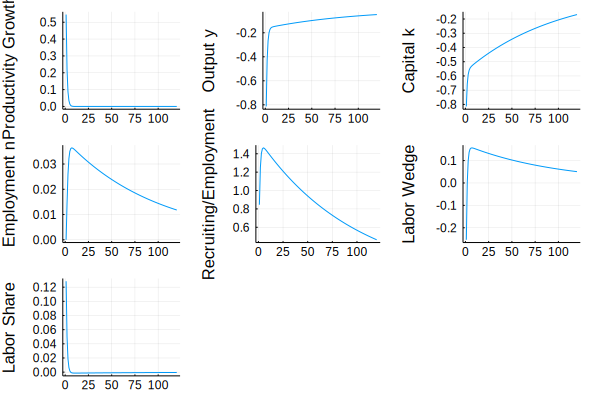

In [108]:
plot(
    plot(devs.*100,legend = false,ylabel="Productivity Growth s"),
    plot((devY.-devs./(1-α)).*100,legend = false,ylabel="Output y"),
    plot((devk.-devs./(1-α)).*100,legend = false,ylabel="Capital k"),
    plot((devn).*100,legend = false,ylabel="Employment n"),
    plot((devΘ).*100,legend = false,ylabel="Recruiting/Employment"),
    plot((devτ.*100),legend = false,ylabel="Labor Wedge"),
    plot((devwny).*100,legend = false,ylabel="Labor Share"),
    #plot((devcy).*100,legend = false,ylabel="C/Y"),
)




## Question 4


Above, we found the labor wedge coefficients using the log linear policy rules, we summarize it here:


In [111]:
τs, τn, τk


(-0.4648727898923413, -0.35097167593937567, -0.32413479121920474)


$$\ln \tau - \ln \tau_{ss} = -0.46  (s-\bar{s})-0.35(\ln n - \ln n_{ss})-0.32(\ln k- \ln k_{ss})$$

## Question 5 


Looking at the table above, we see that $\rho_{\tau, y}=-0.97$ and $\rho_{\tau, c}=-0.99$. Also, $\sigma_\tau = 0.01$. We would observe this value for the labor Wedge if the labor supply elasticyt, $\varepsilon = \infty$, as reported by Shimer in table 1.1. A rather strong assumption. Note that Correlation between labor wedge and $c/y$ is very close to $-1$, while in data, for different values of $\varepsilon$ it ranges from $0.33$ to $-0.13$.

In [115]:
sqrt(Covar[8,8])

0.010810389541169765

## Question 6

I use the same data for labor as Shimer, from Prescott, Ueberfeldt, and Cociuba (2008). For capital Stock I us  Capital Stock at Constant National Prices for United States (key RKNANPUSA666NRUG at FRED)and Real Gross Domestic Product (GDPC1 at FRED) for GDP. All variables were divided by population in Prescott, Ueberfeldt, and Cociuba (2008) and taken logs. I use the HP filter with parameter of 1600, to remove trend and to get the TFP is simply:
$$s-\bar{s}=\frac{y-y_n(\ln n -\ln n_{ss})-y_k  (\ln k - \ln k_{ss})}{y_s}$$
Where the steady state values are the HP filtered trend.

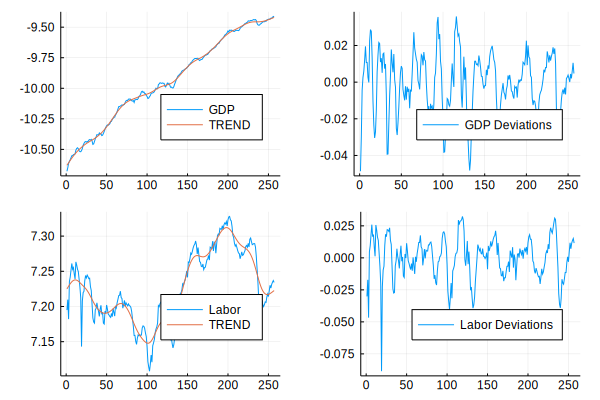

In [139]:
using CSV
using Dierckx #Interpolation package, I did not understand the package Interpolations
using Dates
#Loading Data
Kdata = CSV.read("RKNANPUSA666NRUG.csv") 
Ndata = CSV.read("labor.csv") 
Ydata = CSV.read("GDPC1.csv") 

#Renaming Columns
rename!(Kdata,  [:RKNANPUSA666NRUG => :CapitalStock])
rename!(Ndata,  [Symbol("hours/population") => :Labor])
rename!(Ydata,  [:GDPC1 => :GDP])

#Same starting and ending year
Ndata = Ndata[Kdata[:DATE][1].<=Ndata[:DATE].<=Kdata[:DATE][end],:]
Ydata = Ydata[Kdata[:DATE][1].<=Ydata[:DATE].<=Kdata[:DATE][end],:]

#DATA will be a DataFrame containing all variables we buiild it from Ndata since it is monthly
DATA = copy(Ndata)
#We will use logs only
DATA[:Labor] = log.(DATA[:Labor])
DATA[:GDP] = log.(Ydata[:GDP]./DATA[:Population])

#Now, we need to interpolate Kdata from anual to quarterly 

interpK = Spline1D(Dates.value.(Kdata[:DATE]), Kdata[:CapitalStock])
#Interpolate and get the logs (percapita):
DATA[:CapitalStock] = log.(interpK(Dates.value.(Ndata[:DATE]))./DATA[:Population])

#Now, we have our dataset. We need to use the HP filter to remove trends
using QuantEcon

DATA[:Labor_dev],DATA[:Labor_trend] = hp_filter(DATA[:Labor],1600)
DATA[:GDP_dev],DATA[:GDP_trend] = hp_filter(DATA[:GDP],1600)
DATA[:CapitalStock_dev],DATA[:CapitalStock_trend] = hp_filter(DATA[:CapitalStock],1600)


plot(
    plot([DATA[:GDP],DATA[:GDP_trend]],legend = :bottomright, label = ["GDP","TREND"]),
    plot([DATA[:GDP_dev]], label = ["GDP Deviations"],legend = :bottomright),
    plot([DATA[:Labor],DATA[:Labor_trend]],legend = :bottomright, label = ["Labor","TREND"]),
    plot([DATA[:Labor_dev]],legend = :bottomright, label = ["Labor Deviations"])
    )


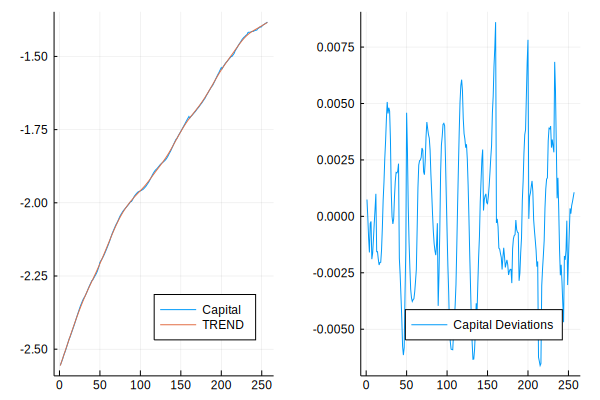

In [140]:
plot(  plot([DATA[:CapitalStock],DATA[:CapitalStock_trend]],legend = :bottomright, label = ["Capital","TREND"]),
    plot([DATA[:CapitalStock_dev]],legend = :bottomright, label = ["Capital Deviations"]))

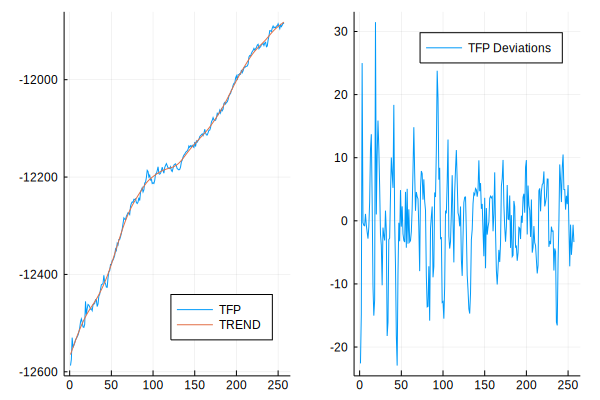

In [153]:
#To get the log deviations of the TFP shock and trend:

DATA[:TFPdev] = (DATA[:GDP_dev] - yn*DATA[:Labor_dev]-yk*DATA[:CapitalStock_dev])./ys
DATA[:TFPtrend] = (DATA[:GDP_trend] - yn*DATA[:Labor_trend]-yk*DATA[:CapitalStock_trend])./ys
DATA[:TFP] = DATA[:TFPtrend]+DATA[:TFPdev]

#Plots!
plot(
    plot([DATA[:TFP],DATA[:TFPtrend]],legend = :bottomright, label = ["TFP","TREND"]),
    plot([DATA[:TFPdev]], label = ["TFP Deviations"])
    )

A simple definition of the Solow residual is the residual of a regression of the following linear model:

$$ y = \beta_0+\beta_1 n+ \beta_2 k +\varepsilon $$

Where $(y,n,k)$ are detrended and expressed in logs. We can easily estimate it:

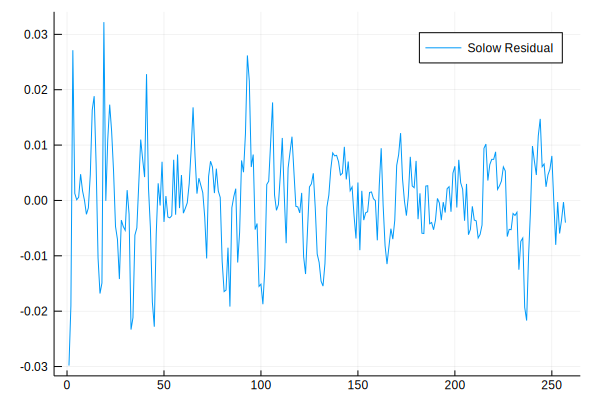

In [145]:
using GLM
ols = glm(@formula(GDP_dev ~ Labor_dev + CapitalStock_dev),
        DATA, Normal(), IdentityLink())

β0,β1,β2 = coef(ols)


solow =  DATA[:GDP_dev] - β1*DATA[:Labor_dev]-β2*DATA[:CapitalStock_dev].-β0


plot([solow],label = ["Solow Residual"])


Apparently, the Solow Residual is very similar to the TFP. Let's put them in the same graph, after some rescaling of the Solow residual (TFP is $e^s$, but we found $s$):

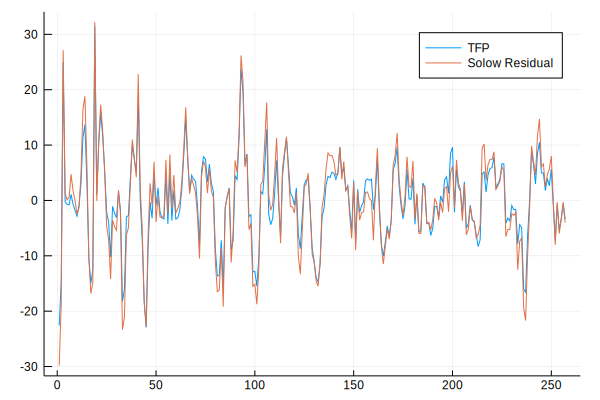

In [158]:
plot([(DATA[:TFPdev]),solow.*1000],label = ["TFP","Solow Residual"])

As we may see above, both measures are very similar.